In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Infant_Mortality_20231123.csv to Infant_Mortality_20231123 (1).csv


In [ ]:
df = pd.read_csv('Infant_Mortality_20231123.csv')
df

,Year,Materal Race or Ethnicity,Infant Mortality Rate,Neonatal Mortality Rate,Postneonatal Mortality Rate,Infant Deaths,Neonatal Infant Deaths,Postneonatal Infant Deaths,Number of Live Births
0,2007,Black Non-Hispanic,9.8,6.0,3.8,287.0,177.0,110.0,29268
1,2013,Other Hispanic,4.3,2.6,1.7,120.0,72.0,48.0,27621
2,2013,Black Non-Hispanic,8.3,5.5,2.9,201.0,132.0,69.0,24108
3,2008,White Non-Hispanic,3.3,2.1,1.1,125.0,82.0,43.0,38383
4,2009,Black Non-Hispanic,9.5,5.8,3.7,259.0,158.0,101.0,27405
...,...,...,...,...,...,...,...,...,...
76,2020,API,2.8,1.9,0.9,44.0,30.0,14.0,15633
77,2020,White NH,2.2,1.5,0.7,77.0,52.0,25.0,35812
78,2020,Black NH,6.9,3.8,3.1,126.0,69.0,57.0,18162
79,2020,Other/Two or More,3.0,2.4,0.6,5.0,4.0,1.0,1670


In [ ]:
encodedDF = pd.get_dummies(df, columns=['Materal Race or Ethnicity'])
encodedDF.dropna(inplace=True)
encodedDF

,Year,Infant Mortality Rate,Neonatal Mortality Rate,Postneonatal Mortality Rate,Infant Deaths,Neonatal Infant Deaths,Postneonatal Infant Deaths,Number of Live Births,Materal Race or Ethnicity_API,Materal Race or Ethnicity_Asian and Pacific Islander,Materal Race or Ethnicity_Black NH,Materal Race or Ethnicity_Black Non-Hispanic,Materal Race or Ethnicity_Non-Hispanic Black,Materal Race or Ethnicity_Non-Hispanic White,Materal Race or Ethnicity_Other Hispanic,Materal Race or Ethnicity_Other/Two or More,Materal Race or Ethnicity_Puerto Rican,Materal Race or Ethnicity_Unknown,Materal Race or Ethnicity_White NH,Materal Race or Ethnicity_White Non-Hispanic
0,2007,9.8,6.0,3.8,287.0,177.0,110.0,29268,0,0,0,1,0,0,0,0,0,0,0,0
1,2013,4.3,2.6,1.7,120.0,72.0,48.0,27621,0,0,0,0,0,0,1,0,0,0,0,0
2,2013,8.3,5.5,2.9,201.0,132.0,69.0,24108,0,0,0,1,0,0,0,0,0,0,0,0
3,2008,3.3,2.1,1.1,125.0,82.0,43.0,38383,0,0,0,0,0,0,0,0,0,0,0,1
4,2009,9.5,5.8,3.7,259.0,158.0,101.0,27405,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2020,4.3,2.8,1.5,99.0,65.0,34.0,23236,0,0,0,0,0,0,1,0,0,0,0,0
76,2020,2.8,1.9,0.9,44.0,30.0,14.0,15633,1,0,0,0,0,0,0,0,0,0,0,0
77,2020,2.2,1.5,0.7,77.0,52.0,25.0,35812,0,0,0,0,0,0,0,0,0,0,1,0
78,2020,6.9,3.8,3.1,126.0,69.0,57.0,18162,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
x = encodedDF[['Neonatal Infant Deaths','Number of Live Births']]
y = encodedDF['Infant Deaths']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=.2, random_state=42)

model = linear_model.LinearRegression()
model.fit(xTrain, yTrain)

yPred = model.predict(xTest)
print('R2 score: ', r2_score(yTest, yPred))
print('Mean Absolute Error: ', mean_absolute_error(yTest, yPred))
print('Mean Squared Error: ', mean_squared_error(yTest, yPred))

R2 score:  0.9891223787083043
Mean Absolute Error:  5.673534488025778
Mean Squared Error:  57.19092833284607


<Axes: xlabel='Materal Race or Ethnicity_White Non-Hispanic', ylabel='count'>

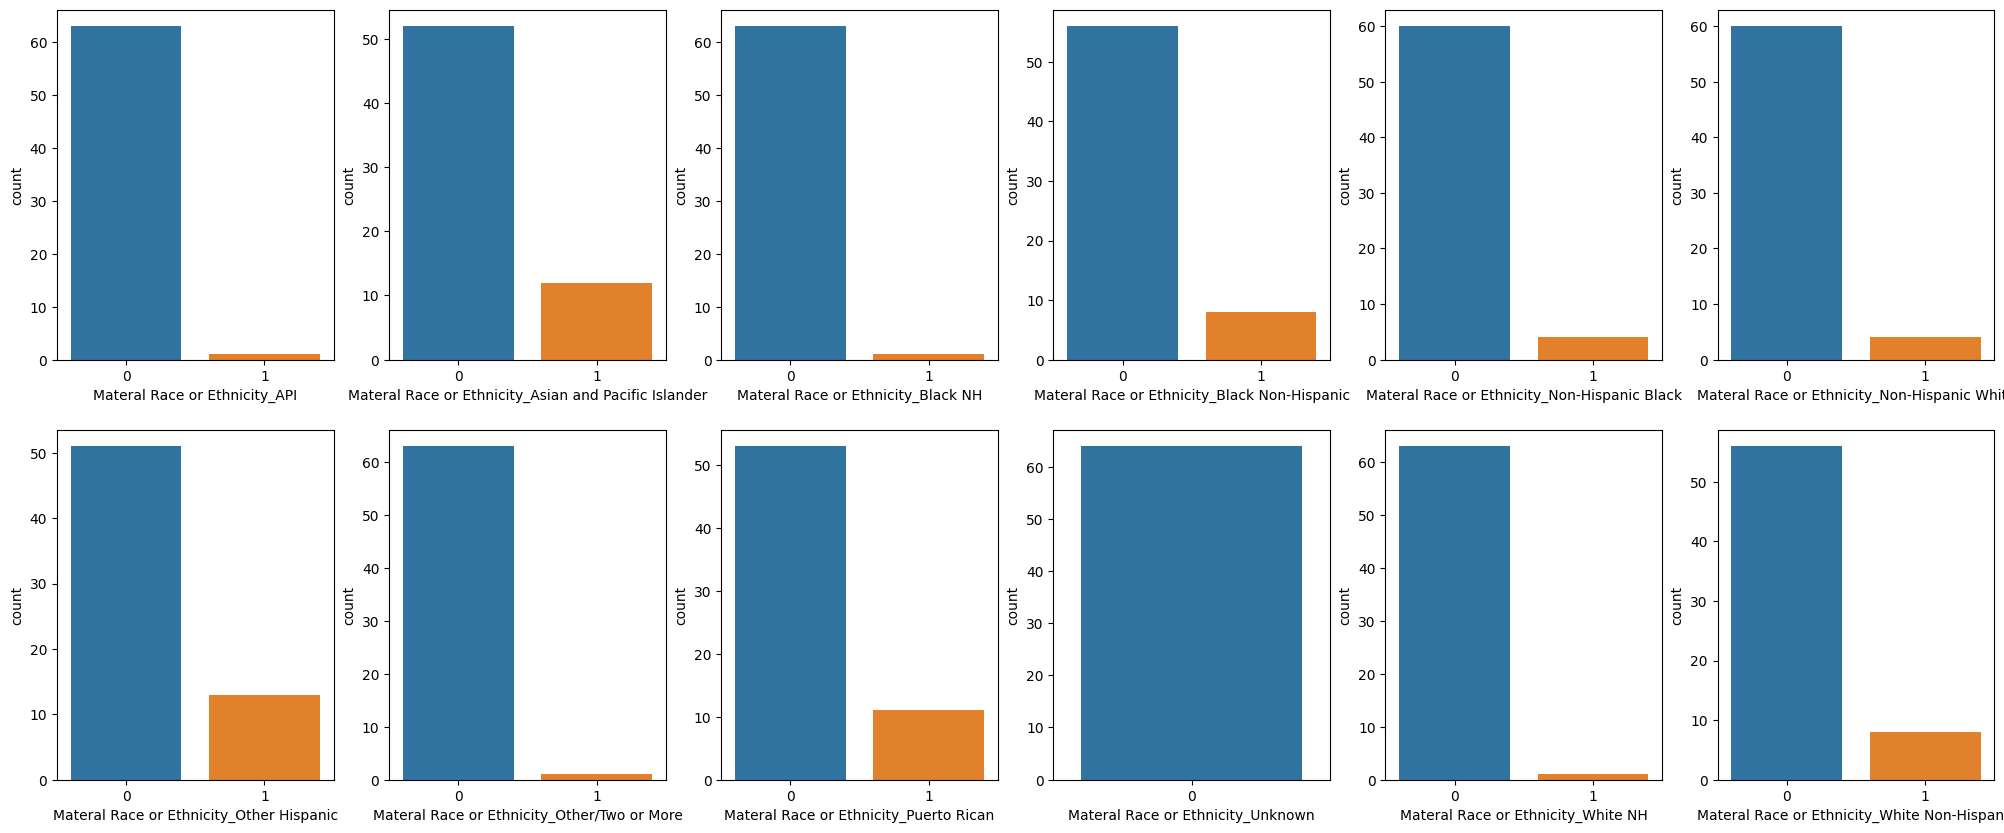

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(25,10))

sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_API', ax=axes[0][0])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Asian and Pacific Islander', ax=axes[0][1])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Black NH', ax=axes[0][2])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Black Non-Hispanic', ax=axes[0][3])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Non-Hispanic Black', ax=axes[0][4])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Non-Hispanic White', ax=axes[0][5])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Other Hispanic', ax=axes[1][0])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Other/Two or More', ax=axes[1][1])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Puerto Rican',	ax=axes[1][2])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_Unknown',	ax=axes[1][3])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_White NH',	ax=axes[1][4])
sns.countplot(data=encodedDF, x='Materal Race or Ethnicity_White Non-Hispanic', ax=axes[1][5])


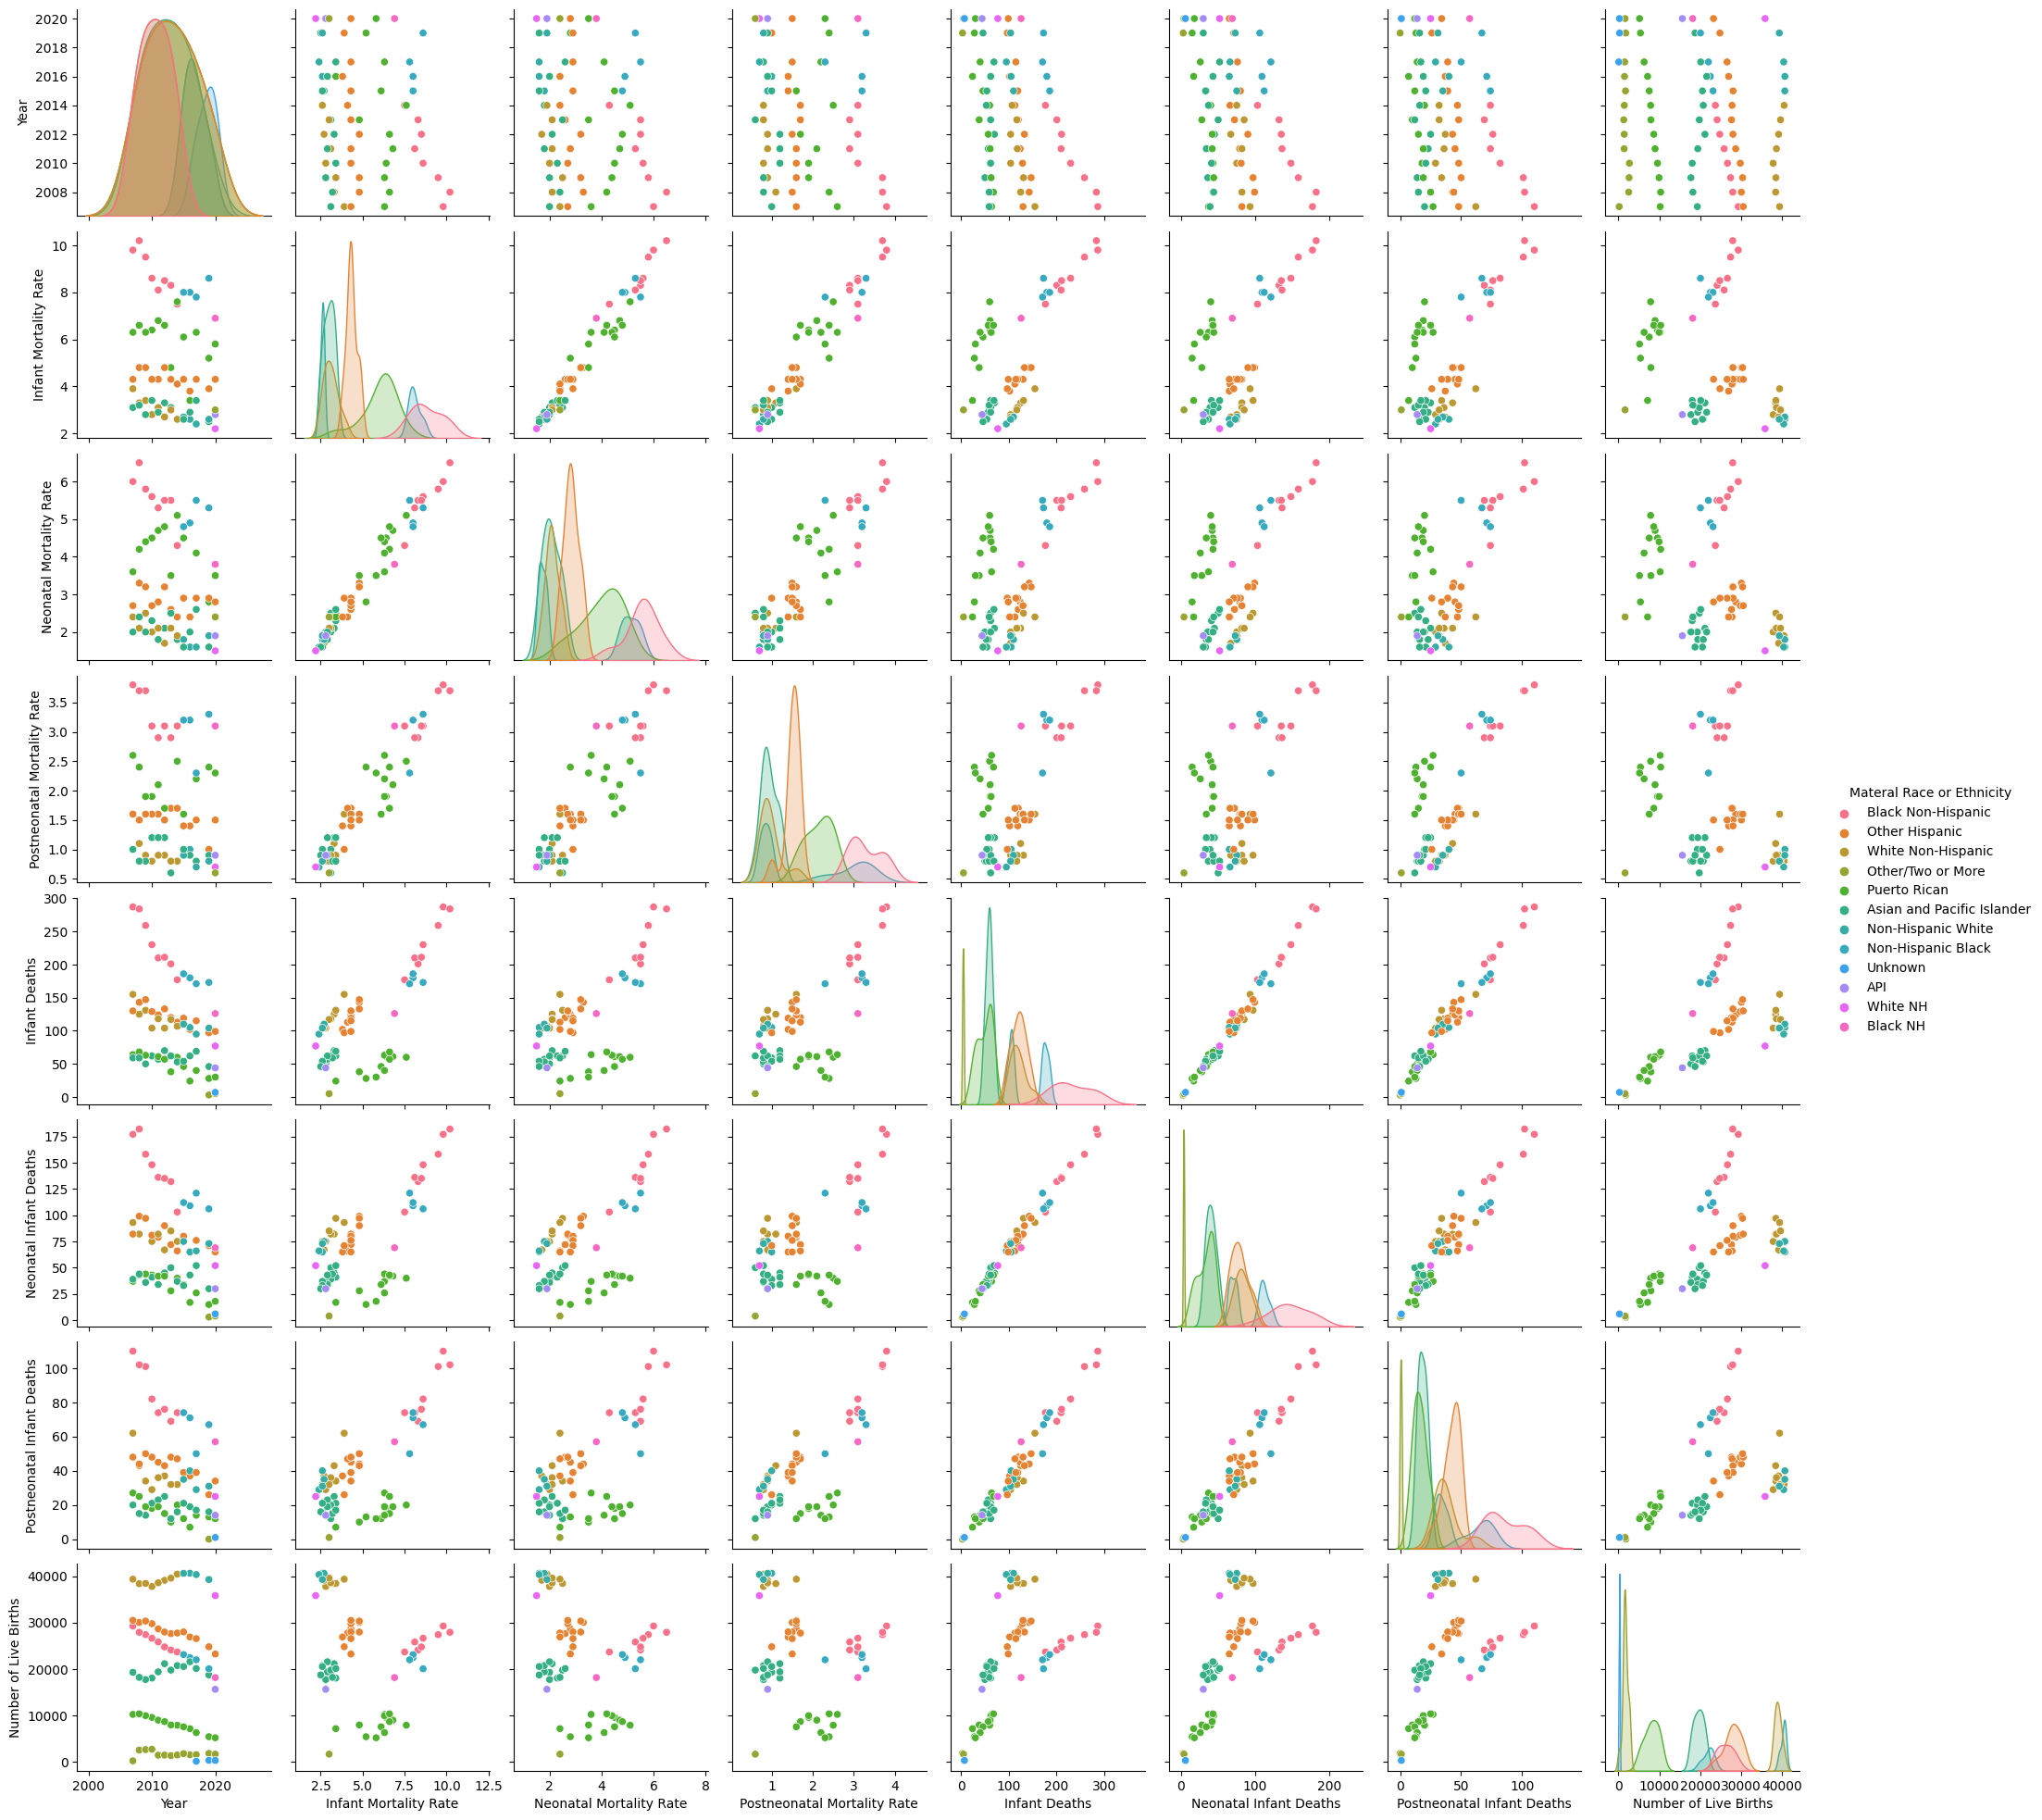

In [ ]:
sns.pairplot(df, hue='Materal Race or Ethnicity')

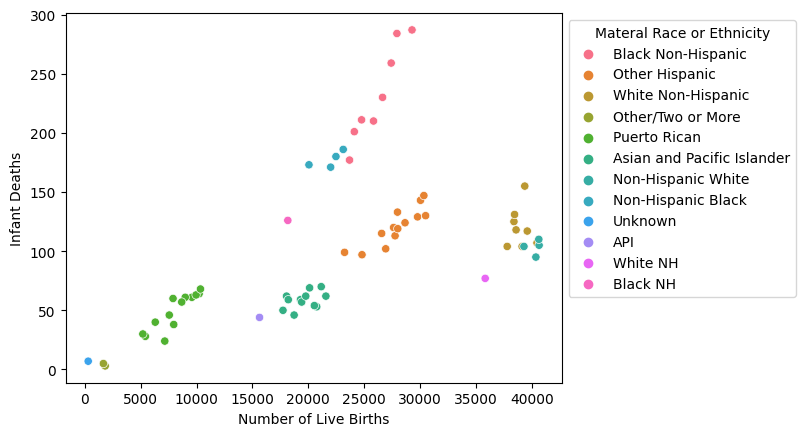

In [ ]:
scat = sns.scatterplot(data=df, x='Number of Live Births', y='Infant Deaths', hue='Materal Race or Ethnicity')
sns.move_legend(scat, 'upper left', bbox_to_anchor=(1,1))


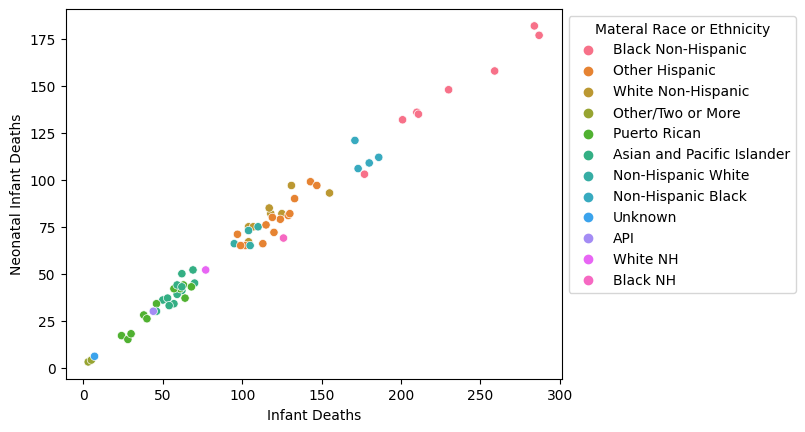

In [ ]:
scat = sns.scatterplot(data=df, x='Infant Deaths', y='Neonatal Infant Deaths', hue='Materal Race or Ethnicity')
sns.move_legend(scat, 'upper left', bbox_to_anchor=(1,1))

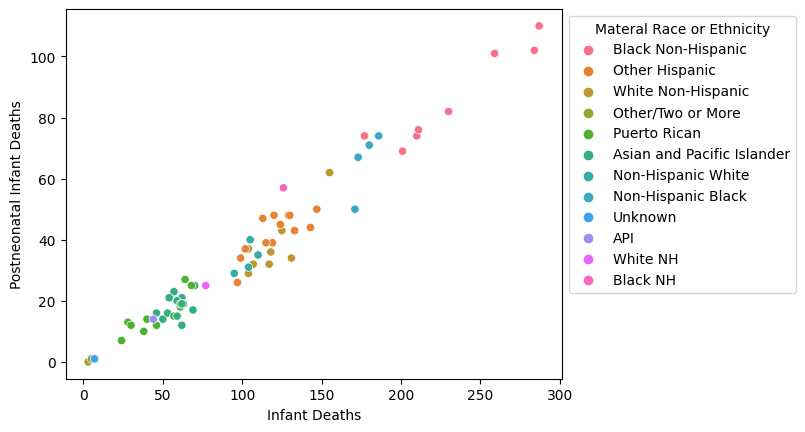

In [ ]:
scat = sns.scatterplot(data=df, x='Infant Deaths', y='Postneonatal Infant Deaths', hue='Materal Race or Ethnicity')
sns.move_legend(scat, 'upper left', bbox_to_anchor=(1,1))

<Axes: xlabel='Year', ylabel='Number of Live Births'>

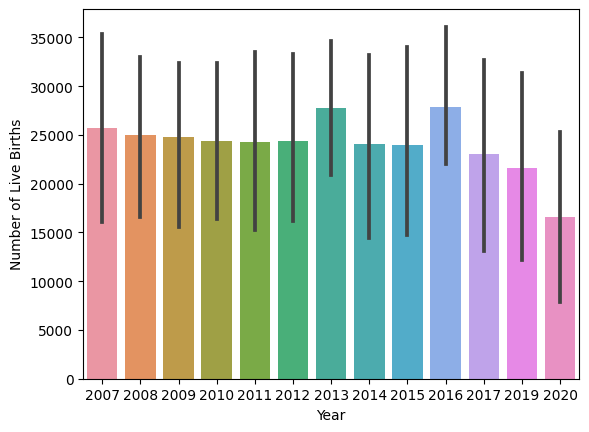

In [ ]:
sns.barplot(data=encodedDF, x='Year', y='Number of Live Births')

count     64.000000
mean     110.125000
std       62.304552
min        5.000000
25%       61.000000
50%      104.000000
75%      131.500000
max      287.000000
Name: Infant Deaths, dtype: float64

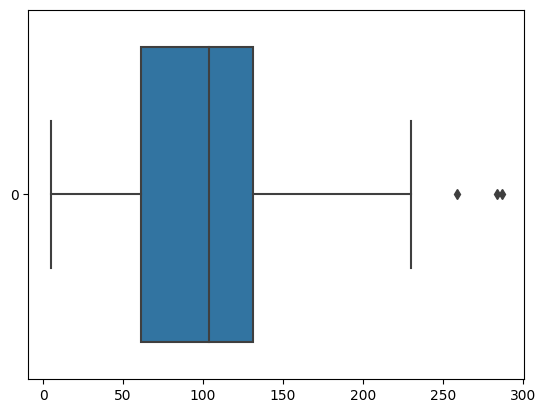

In [ ]:
sns.boxplot(data=encodedDF['Infant Deaths'], orient='h')
encodedDF['Infant Deaths'].describe()

In [ ]:
matrix_data_corr = df.corr()
matrix_data_corr

<ipython-input-16-9fe70ab5c1b5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_data_corr = df.corr()


,Year,Infant Mortality Rate,Neonatal Mortality Rate,Postneonatal Mortality Rate,Infant Deaths,Neonatal Infant Deaths,Postneonatal Infant Deaths,Number of Live Births
Year,1.000000,-0.180738,-0.190375,-0.141254,-0.360415,-0.371669,-0.331193,-0.157183
Infant Mortality Rate,-0.180738,1.000000,0.982832,0.960676,0.644155,0.610781,0.676220,-0.287948
Neonatal Mortality Rate,-0.190375,0.982832,1.000000,0.895413,0.601035,0.585685,0.605773,-0.320702
Postneonatal Mortality Rate,-0.141254,0.960676,0.895413,1.000000,0.670351,0.609899,0.743540,-0.254369
Infant Deaths,-0.360415,0.644155,0.601035,0.670351,1.000000,0.992662,0.980922,0.541512
Neonatal Infant Deaths,-0.371669,0.610781,0.585685,0.609899,0.992662,1.000000,0.950216,0.572719
Postneonatal Infant Deaths,-0.331193,0.676220,0.605773,0.743540,0.980922,0.950216,1.000000,0.474620
Number of Live Births,-0.157183,-0.287948,-0.320702,-0.254369,0.541512,0.572719,0.474620,1.000000


<Axes: >

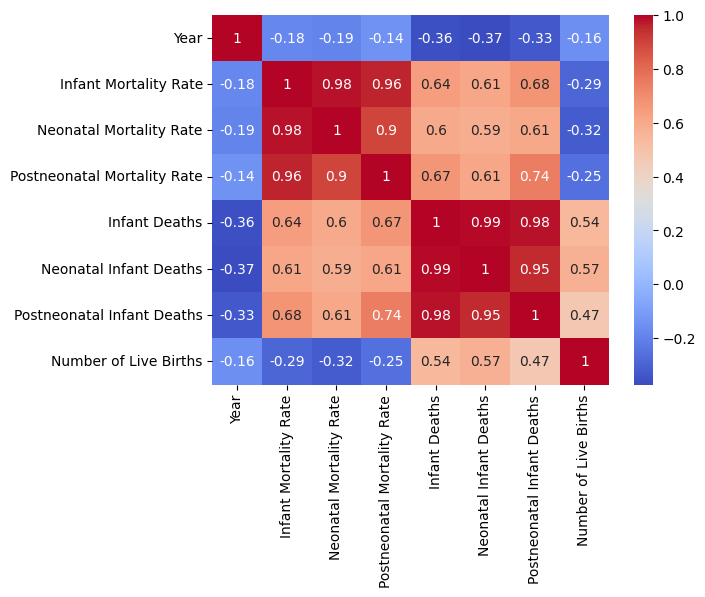

In [ ]:
sns.heatmap(matrix_data_corr, annot=True, cmap='coolwarm')